## Steps
* Decide clusters
* Select random centroids
* Assign clusters
* Move centroids
* Check finish

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install kmeans
from sklearn.cluster import KMeans
import numpy as np

In [2]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

In [3]:
X,y = make_blobs(n_samples=100, centers=centroids, cluster_std=cluster_std, n_features=2, random_state=2)

In [4]:
km = KMeans(n_clusters=2, max_iter=100)
km.fit_predict(X)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [5]:
X

array([[-5.3135082 , -4.22898826],
       [-5.65325027, -4.15754372],
       [-4.49711858, -6.24528809],
       [-4.30488039, -7.03346655],
       [ 5.36505352,  5.77408203],
       [-5.26905696, -2.76863321],
       [-7.1361961 , -3.35972919],
       [ 5.79918   ,  6.26261366],
       [-7.04032305, -4.95374448],
       [ 5.39652016,  4.68538256],
       [ 6.11788673,  4.72575791],
       [ 9.10869262,  5.82112088],
       [-4.49814279, -5.8442137 ],
       [ 5.61014409,  5.4234969 ],
       [ 3.54663565,  4.66198222],
       [ 6.53176032,  3.01415423],
       [ 4.67495037,  4.43976549],
       [-4.17529699, -3.75178708],
       [-5.46200535, -4.64911151],
       [-5.67767558, -6.43943903],
       [-3.63276458, -3.78211437],
       [-4.61813377, -4.43372456],
       [ 4.77175244,  2.93038774],
       [-4.44854596, -2.70779199],
       [ 5.96078194,  5.75837035],
       [-5.0191305 , -3.82499878],
       [ 4.53165374,  3.74527969],
       [-6.42121723, -5.1534952 ],
       [-5.38151648,

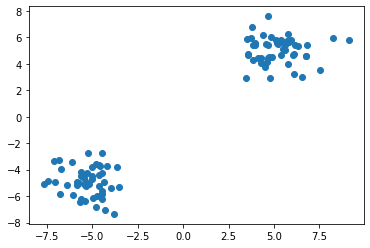

In [6]:
plt.scatter(X[:,0], X[:,1])

In [7]:
import random
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]),self.n_clusters)
        self.centroids = X[random_index] # select random centroids
        
        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
    
            old_centroids = self.centroids
            
            # move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            
            
            # check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
            
    def assign_clusters(self, X):
        cluster_group = []
        distances = []
            
        for row in X:
            for centroid in self.centroids:
                # now i calculate the distance between current row and current centroid
                distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))  # Eucledian Distance
            min_distance = min(distances)
            index_position = distances.index(min_distance)
            cluster_group.append(index_position)
            
            distances.clear()
                    
        return np.array(cluster_group)
        
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        
        cluster_type = np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        
        return np.array(new_centroids)

In [11]:
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

In [12]:
X,y = make_blobs(n_samples=100, centers=centroids, cluster_std=cluster_std, n_features=2, random_state=2)

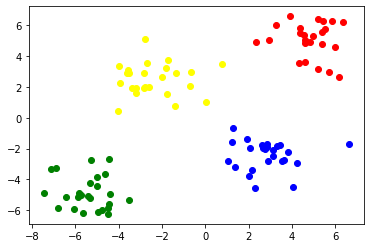

In [13]:
km = KMeans(n_clusters=4, max_iter=100)
y_pred = km.fit_predict(X)

plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1], color='red')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1], color='blue')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1], color='green')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1], color='yellow')

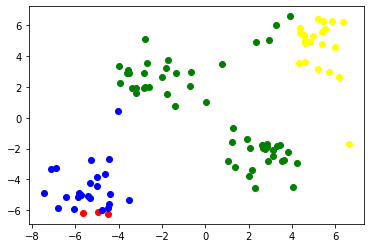

In [14]:
# When max iteration value is not suitable provided
km = KMeans(n_clusters=4, max_iter=1)
y_pred = km.fit_predict(X)

plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1], color='red')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1], color='blue')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1], color='green')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1], color='yellow')

In [15]:
# on the different dataset
df = pd.read_csv('images/student_clustring.csv')

<IPython.core.display.Javascript object>

In [16]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [17]:
X = df.iloc[:,:].values

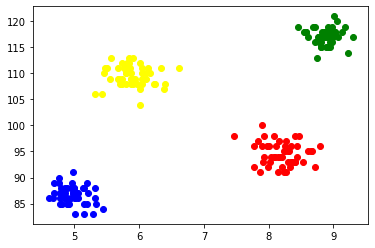

In [18]:
# When max iteration value is not suitable provided
km = KMeans(n_clusters=4, max_iter=100)
y_pred = km.fit_predict(X)

plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1], color='red')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1], color='blue')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1], color='green')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1], color='yellow')